In [1]:
from tensorflow.keras.layers import (Input, Dense, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D)
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import tensorflow as tf
from typing import Tuple
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(-1)

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
def resnet_block(inputs, filters, strides=1): 
    x = Conv2D(filters, kernel_size=3, strides=strides, padding="same", 
              kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding="same", 
              kernel_initializer="he_normal")(x)

    if strides != 1 or inputs.shape[-1] != filters: 
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, 
                         padding='same', kernel_initializer='he_normal')(inputs)
        shortcut = BatchNormalization()(shortcut)
    else: 
        shortcut = inputs

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def create_resnet(input_shape: Tuple, num_classes: int, filters=16): 
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    for filters, strides in zip([16, 32, 64], [1, 2, 2]): 
        for i in range(3): 
            s = strides if i == 0 else 1
            x = resnet_block(x, filters=filters, strides=s)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = tf.keras.models.Model(inputs, outputs)
    return model

In [5]:
num_classes = len(np.unique(y_train))
model = create_resnet((32, 32, 3), num_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 32, 32, 16)        │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 32, 32, 16)        │              64 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu (ReLU)                  │ (None, 32, 32, 16)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 32, 32, 16)        │           2,320 │ re_lu[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 32, 32, 16)        │              64 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_1 (ReLU)                │ (None, 32, 32, 16)        │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 32, 32, 16)        │           2,320 │ re_lu_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 32, 32, 16)        │               0 │ conv2d_2[0][0],            │
│                               │                           │                 │ re_lu[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_2 (ReLU)                │ (None, 32, 32, 16)        │               0 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 32, 32, 16)        │           2,320 │ re_lu_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 32, 32, 16)        │              64 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_3 (ReLU)                │ (None, 32, 32, 16)        │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 16)        │           2,320 │ re_lu_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 32, 32, 16)        │               0 │ conv2d_4[0][0],            │
│                               │                           │               

 Total params: 273,482 (1.04 MB)

 Trainable params: 272,586 (1.04 MB)

 Non-trainable params: 896 (3.50 KB)

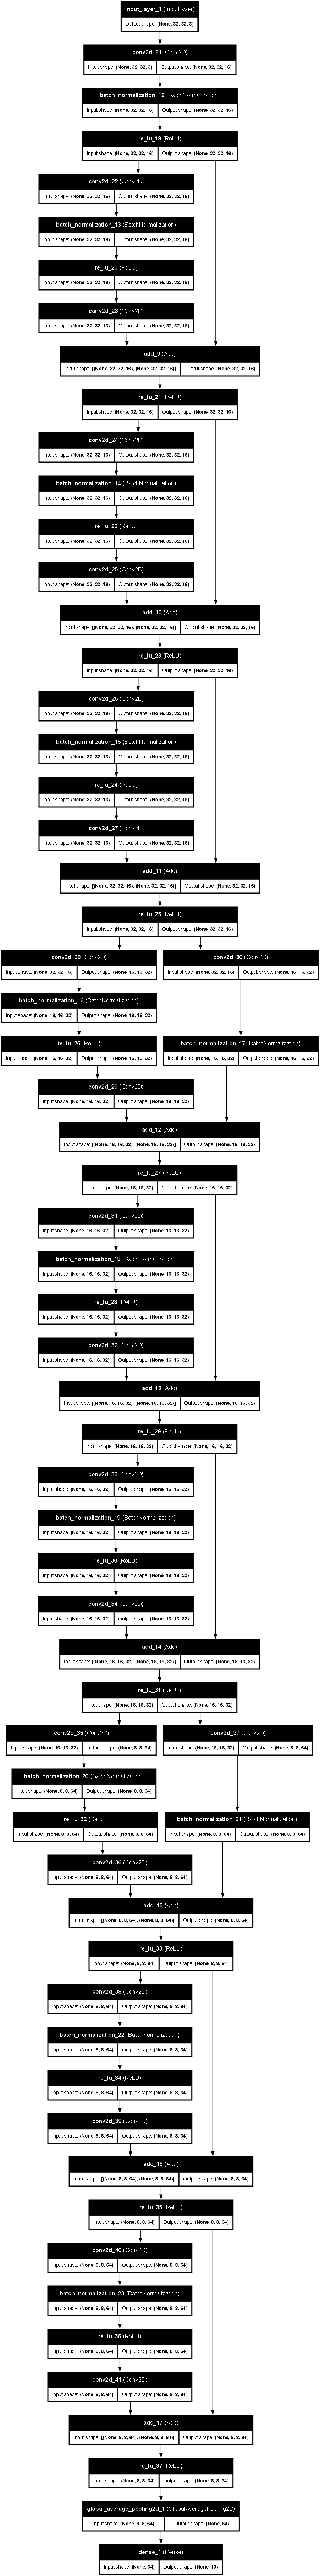

In [21]:
plot_model(model, to_file='resnet20.png', show_shapes=True, show_layer_names=True, dpi=72)
#Image(filename='resnet20.png')

In [25]:
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model.keras", 
    monitor="val_accuracy", 
    save_best_only=True, 
    mode="max"
)

In [24]:
history = model.fit(x_train, y_train, epochs=20, callbacks=[checkpoint])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6709 - loss: 0.9306
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7359 - loss: 0.7491
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7791 - loss: 0.6302
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8086 - loss: 0.5472
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8341 - loss: 0.4813
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8511 - loss: 0.4255
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8689 - loss: 0.3771
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8818 - loss: 0.3359
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8942 - loss: 0.3017
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9058 - loss: 0.2654
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9161 - loss: 0.2366
Epoch 12

In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test_loss: {test_loss}, test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8060 - loss: 0.8225
test_loss: 0.8224819302558899, test_acc: 0.8059999942779541


Recreating model without Softmax

In [44]:
def create_resnet_logits(input_shape: Tuple, num_classes: int, filters=16): 
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    for filters, strides in zip([16, 32, 64], [1, 2, 2]): 
        for i in range(3): 
            s = strides if i == 0 else 1
            x = resnet_block(x, filters=filters, strides=s)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes)(x)
    model = tf.keras.models.Model(inputs, outputs)
    return model
model_logits = create_resnet_logits((32, 32, 3), num_classes)
model_logits.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer="adam", 
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_logits.keras", 
    monitor="val_accuracy", 
    save_best_only=True, 
    mode="max"
)
history = model_logits.fit(x_train_new, y_train_new, epochs=20, callbacks=[checkpoint])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - loss: 1.3804 - sparse_categorical_accuracy: 0.4942
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - loss: 0.9804 - sparse_categorical_accuracy: 0.6499
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - loss: 0.7978 - sparse_categorical_accuracy: 0.7210
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - loss: 0.6720 - sparse_categorical_accuracy: 0.7641
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - loss: 0.5894 - sparse_categorical_accuracy: 0.7947
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - loss: 0.5257 - sparse_categorical_accuracy: 0.8162
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - loss: 0.4607 - sparse_categorical_accuracy: 0.8393
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - loss: 0.4133 - sparse_categorical_accuracy: 0.8552
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - loss: 0.3684 - sparse_categorical_accuracy: 0.8702
Epoch 10/20
1407/14

In [9]:
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

In [7]:
model_logits = tf.keras.models.load_model("best_model_logits.keras")
test_loss, test_acc = model_logits.evaluate(x_test, y_test)
print(f"test_loss: {test_loss}, test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9532 - sparse_categorical_accuracy: 0.7872
test_loss: 0.9531586766242981, test_acc: 0.7871999740600586


In [27]:
class TemperatureScaling(tf.keras.Model): 
    def __init__(self): 
        super().__init__()
        self.temperature = tf.Variable(1.0, 
                                       trainable=True, 
                                       dtype=tf.float32)
        
    def call(self, logits: tf.Tensor) -> tf.Tensor: 
        return logits/self.temperature

    def predict_proba(self, logits: tf.Tensor) -> tf.Tensor: 
        scaled_logits = self.call(logits)
        return tf.nn.softmax(scaled_logits, axis=-1)


def nll_loss(logits, labels, temperature): 
    scaled_probs=tf.nn.softmax(logits / temperature)
    loss = tf.keras.losses.sparse_categorical_crossentropy(labels, scaled_probs, from_logits=True)
    return tf.reduce_mean(loss)

def scaled_softmax(logits, temperature): 
    return tf.nn.softmax(logits / temperature)

def calibrate_temperature(val_logits: tf.Tensor, val_labels: tf.Tensor, epochs=1000, learning_rate=0.01, verbose=True):
    #Initialize temperature scaler
    temperature_scaler = TemperatureScaling()

    #optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    #Training history
    losses = []
    temperatures = []
    for i in range(epochs): 
        with tf.GradientTape() as tape: 
            loss = nll_loss(val_logits, val_labels, temperature_scaler.temperature) 

        #Compute gradients and update temperature
        grad = tape.gradient(loss, [temperature_scaler.temperature])
        optimizer.apply_gradients(zip(grad, [temperature_scaler.temperature]))

    optimal_temperature = float(temperature_scaler.temperature.numpy())
    print(f"Optimal temperature = {optimal_temperature}")
    return temperature_scaler, optimal_temperature



In [29]:
logits = model_logits(x_val)
labels = y_val

#Calibrate temperature scaling
temperature_scaler, optimal_temp = calibrate_temperature(
    val_logits=logits, 
    val_labels=labels
)

#use calibrated model for predictions
test_logits = model_logits(x_test)
test_labels = y_test 

#Original probabilities (uncalibrated)
original_probs = tf.nn.softmax(test_logits).numpy()

#Calibrated probabilities 
calibrated_probs = temperature_scaler.predict_proba(test_logits).numpy()

def evaluate_calibration(probs, labels):
    """Simple calibration evaluation using ECE"""
    predictions = np.argmax(probs, axis=1)
    confidences = np.max(probs, axis=1)
    accuracies = (predictions == labels)
    
    # Simple ECE with 10 bins
    n_bins = 10
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]
    
    ece = 0.0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (confidences > bin_lower) & (confidences <= bin_upper)
        prop_in_bin = np.mean(in_bin)
        
        if prop_in_bin > 0:
            acc_in_bin = np.mean(accuracies[in_bin])
            avg_conf_in_bin = np.mean(confidences[in_bin])
            ece += np.abs(acc_in_bin - avg_conf_in_bin) * prop_in_bin
    
    return ece

# Compare calibration
ece_original = evaluate_calibration(original_probs, y_test)
ece_calibrated = evaluate_calibration(calibrated_probs, y_test)

print(f"\nCalibration Results:")
print(f"Original ECE: {ece_original:.4f}")
print(f"Calibrated ECE: {ece_calibrated:.4f}")

Optimal temperature = 0.24705952405929565

Calibration Results:
Original ECE: 0.8212
Calibrated ECE: 0.8814
